In [1]:
# EDA day one

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [ ]:
# Basics of ploting 

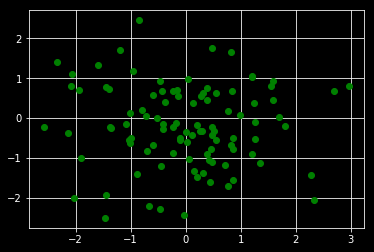

In [8]:
plt.style.use('dark_background')
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'go')
plt.grid(True)

In [11]:
np.random.normal(size=100)
# Will produce a 1 dimensional array, with len = size.

array([-0.22427257,  0.87830633, -1.28295501,  2.77326495, -1.23113577,
        1.69481956, -0.83675317,  1.1885934 , -0.16920283, -0.72035205,
        1.8327291 ,  0.46941179, -0.99811266, -1.52707822,  0.27422111,
        1.35929312, -0.46900193,  0.89460539, -0.98038601, -1.61158033,
        0.05726584,  0.79341319,  0.4078246 , -0.12767   , -2.66366137,
       -0.91690779,  0.53232613,  1.83788022,  1.33803218, -0.17359796,
        0.4382392 ,  1.43264133, -1.39689001,  2.27593347, -2.01048531,
       -1.26126852, -0.38384108, -1.72904811, -0.76470878, -0.23816563,
       -0.92358129, -0.76482759,  1.08620895, -0.55987759,  1.81750753,
        1.23657159,  1.53061858, -0.53452959,  0.41289808,  0.89143125,
       -0.25224536,  0.28984885,  0.21386593, -1.19360057,  0.07505246,
        1.00066028,  1.34150396, -1.67381182, -1.12497973,  1.40095871,
       -1.7815176 ,  1.02071341, -0.43828416, -0.7218994 , -0.85832198,
       -0.23787768,  0.21837043,  0.30036059, -1.10909211,  0.97

# Saving the plot, beautification, grids, and altering the size of the Image

In [10]:
x = pd.read_excel('titanic.xls')

In [11]:
x['fare_2'] = x['fare']

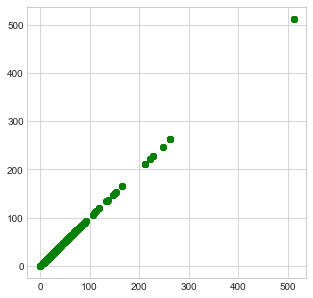

In [13]:
# For a black varriant aalways use plt.style.use()
plt.figure(figsize=(5,5))
plt.style.use('seaborn-whitegrid')
plt.plot(x['fare'],x['fare'], 'go')
plt.grid(True)


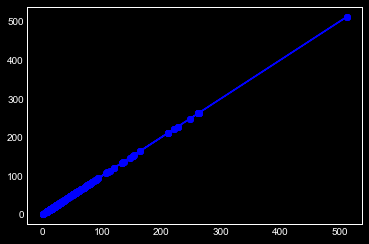

In [15]:
plt.style.use('dark_background')
plt.plot(x['fare'],x['fare_2'], 'bo-')
plt.grid()
plt.savefig('fareVsfare_2')

In [ ]:
# Setting the font
# Subplots 

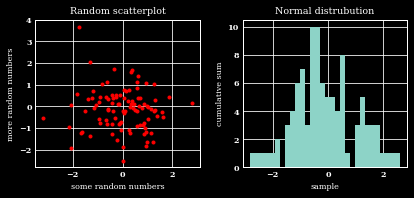

In [16]:
# rc_context() is used to change the font
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
# What ever falls under this indendation will get this ffont
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    # using the subplot object we can set the axis labels, title and so on
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    # plt.plot() is used plot the image
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=30)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout(2)
    # tight_layout is used to set the margins
    plt.savefig("normalvars.png")

# Plotting in Pandas

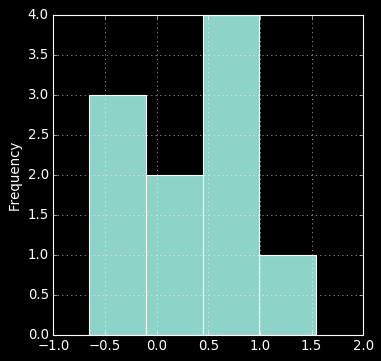

In [149]:
plt.style.use('dark_background')
plt.figure(figsize=(5,5))
normals = pd.Series(np.random.normal(size=10))
normals.plot(kind = 'hist', bins = 4)
plt.grid(True)
plt.show()

# Similarly, for a DataFrame:

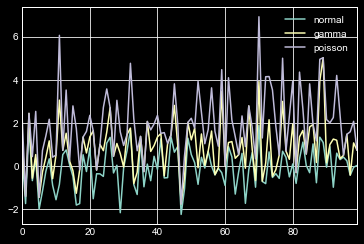

In [27]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(1).plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000029BCDA00F0>,
      dtype=object)

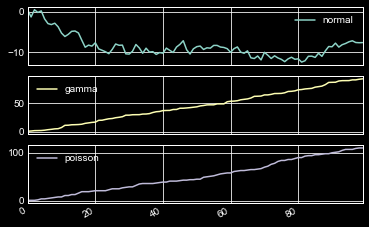

In [28]:
variables.cumsum(0).plot(subplots=True)

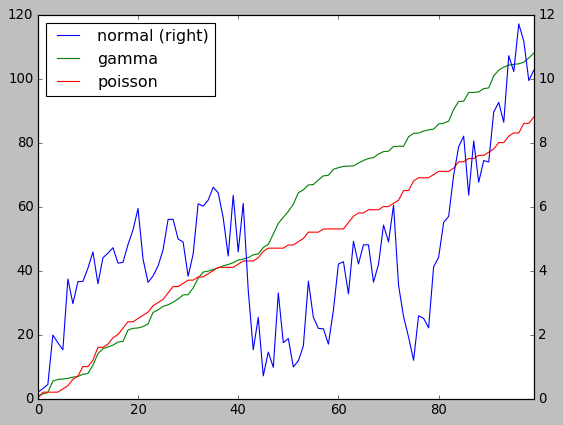

In [194]:
variables.cumsum(0).plot(secondary_y='normal')

# bar plots

In [29]:
titanic = pd.read_excel("titanic.xls")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

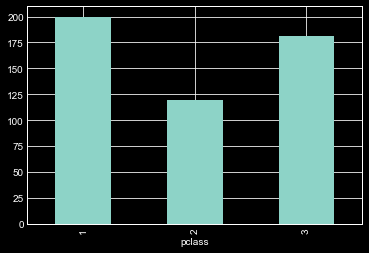

In [34]:
# Bar plot
# This is pandas barplot
plt.style.use('dark_background')
pcg = titanic.groupby('pclass')
pcg.survived.sum().plot(kind='bar')
plt.show()

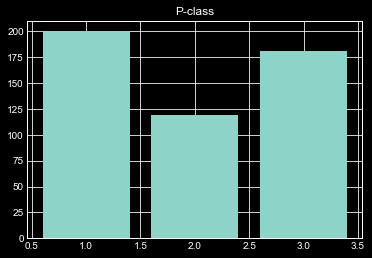

In [35]:
# The same can be done using Matplotlib barplot as follows
plt.bar(pcg.survived.sum().index,pcg.survived.sum())
plt.title("P-class")
plt.show()

# barh will produce horizontal barplot

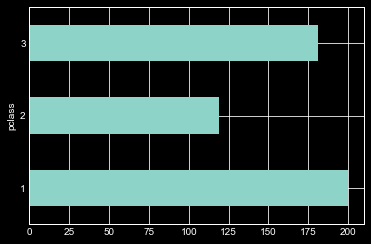

In [36]:
pcg = titanic.groupby('pclass')
pcg.survived.sum().plot(kind='barh')
plt.show()

# Stacked bar chart
    Multivariate plotting
    We are looking at the relationship between mutiple variable

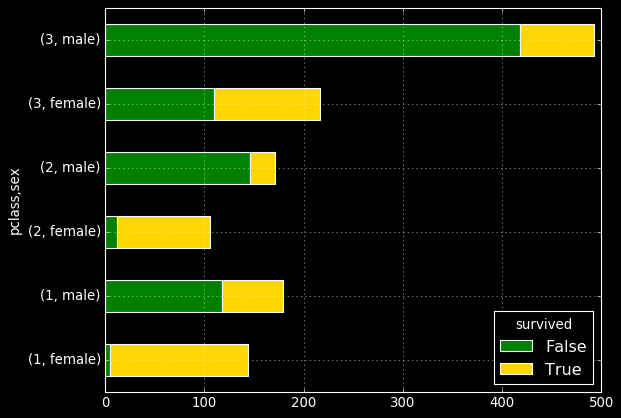

In [44]:
plt.style.use('dark_background')
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='barh',stacked = True ,color=['green','gold'], grid=True)
plt.show()

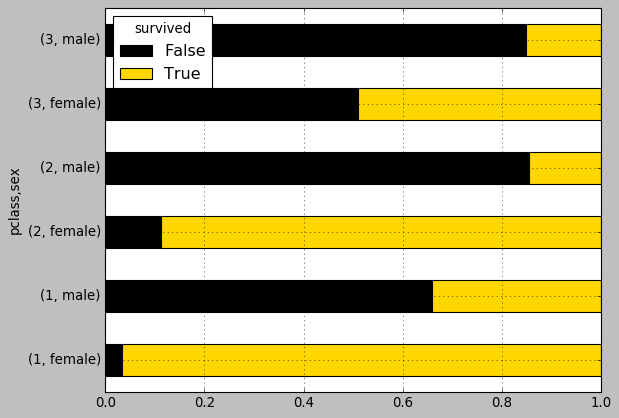

In [45]:
plt.style.use('classic')
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'], grid = True)
plt.show()

# Histogram

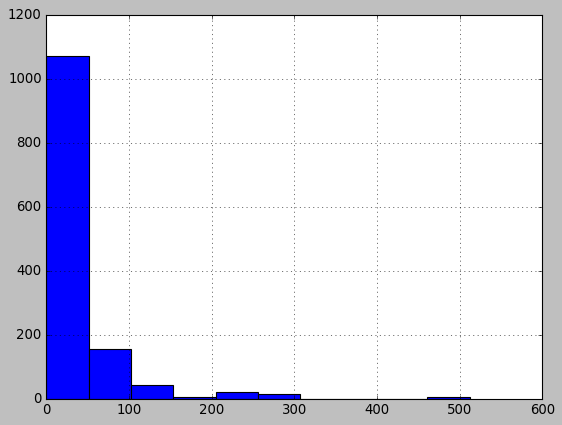

In [50]:
plt.style.use('classic')
titanic.fare.hist( grid=True)
plt.show()

In [255]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

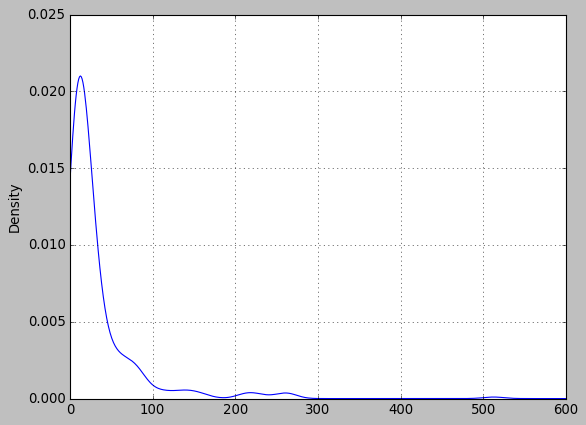

In [257]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))
plt.grid(True)

C:\Users\w4025\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


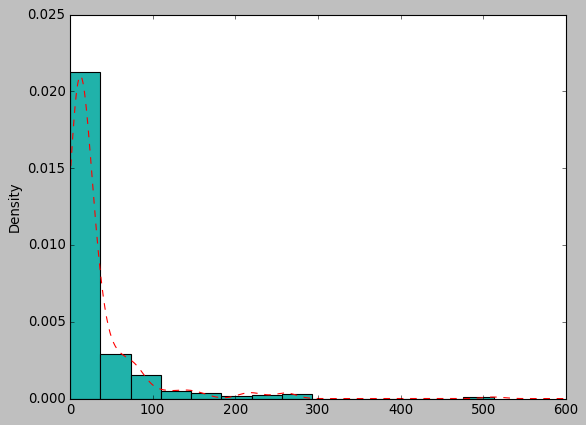

In [259]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')
plt.show()

# Boxplots & Outliers

### Outliers

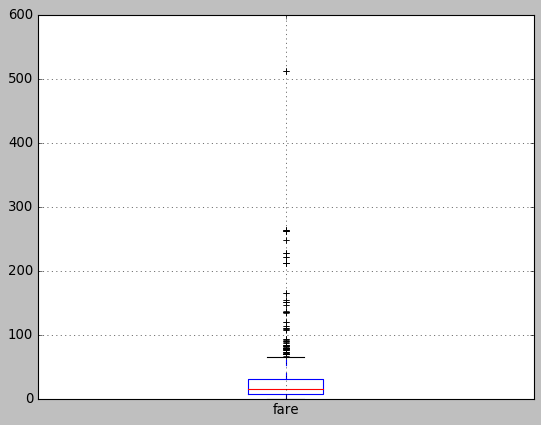

In [69]:
titanic.boxplot('fare')
plt.show()

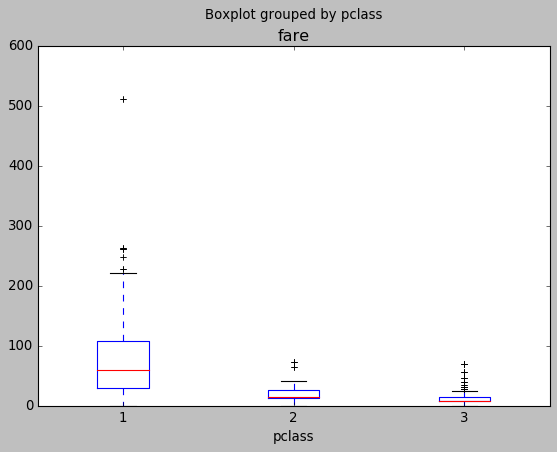

In [263]:
plt.style.use('classic')
titanic.boxplot(column='fare', by='pclass', grid=False)
plt.show()

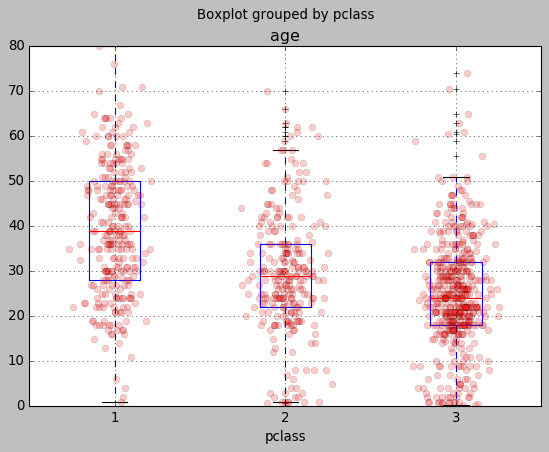

In [67]:
titanic.boxplot(column='age', by='pclass', grid=True)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i,0.09, size=len(y))
    plt.plot(x, y, 'ro', alpha=0.2)

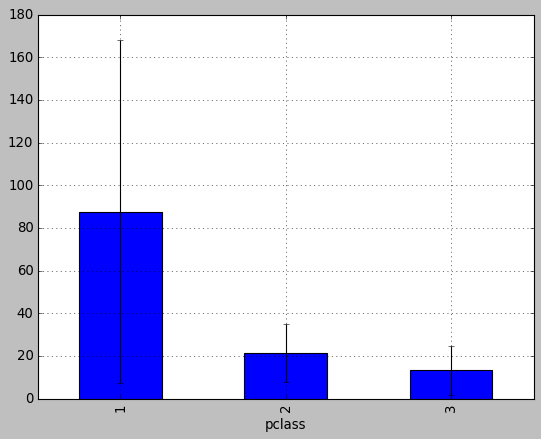

In [281]:
plt.style.use('classic')
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', grid = True , yerr=titanic.groupby('pclass')['fare'].std())
plt.show()

# Scatterplots

In [71]:
baseball = pd.read_csv("baseball.csv")
baseball.head()

      id     player  year  stint team  lg   g  ab  r   h  ...  rbi   sb   cs  \
0  88641  womacto01  2006      2  CHN  NL  19  50  6  14  ...  2.0  1.0  1.0   
1  88643  schilcu01  2006      1  BOS  AL  31   2  0   1  ...  0.0  0.0  0.0   
2  88645  myersmi01  2006      1  NYA  AL  62   0  0   0  ...  0.0  0.0  0.0   
3  88649  helliri01  2006      1  MIL  NL  20   3  0   0  ...  0.0  0.0  0.0   
4  88650  johnsra05  2006      1  NYA  AL  33   6  0   1  ...  0.0  0.0  0.0   

   bb   so  ibb  hbp   sh   sf  gidp  
0   4  4.0  0.0  0.0  3.0  0.0   0.0  
1   0  1.0  0.0  0.0  0.0  0.0   0.0  
2   0  0.0  0.0  0.0  0.0  0.0   0.0  
3   0  2.0  0.0  0.0  0.0  0.0   0.0  
4   0  4.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 23 columns]

In [75]:
baseball.ab.corr(baseball.stint)

-0.2163330091651084

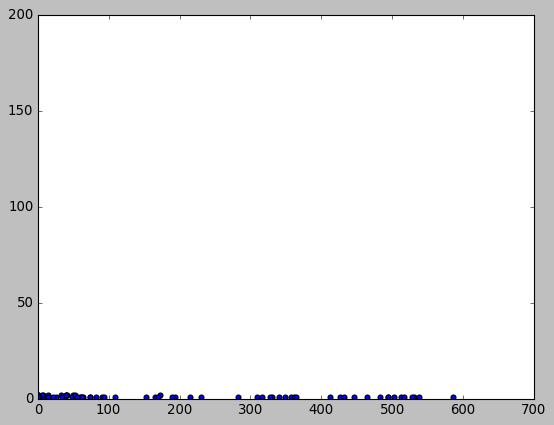

In [76]:
plt.scatter(baseball.ab, baseball.stint)
plt.xlim(0, 700)
plt.ylim(0, 200)
plt.show()

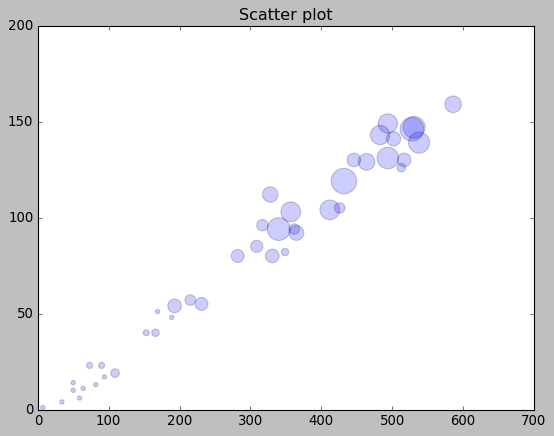

In [79]:
plt.title('Scatter plot')
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*15, alpha=0.2)
plt.xlim(0, 700); plt.ylim(0, 200)
plt.show()

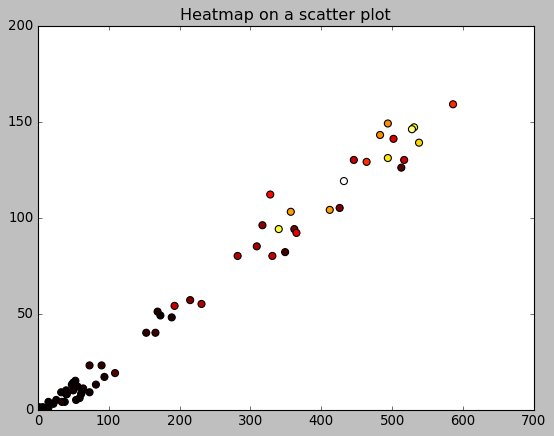

In [84]:
plt.title('Heatmap on a scatter plot')
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0, 700)
plt.ylim(0, 200)
plt.show()

# Univariate Analysis

In [320]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

# Bivariate Analysis

In [328]:
titanic['age'].corr(titanic['fare'])

0.1787393231464611

In [322]:
titanic['age'].corr(titanic['fare'])
# Speaks about the correlation, between 2 colummns

0.1787393231464611

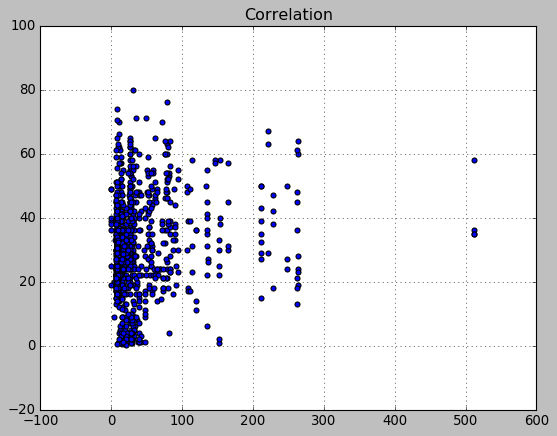

In [327]:
plt.title("Correlation")
plt.scatter(titanic['fare'],titanic['age'])
plt.grid(True)